___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather = pd.DataFrame(pd.read_csv("weather.csv"))

In [3]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.shape

(8022, 26)

In [5]:
print(weather[["TMIN", "TAVG", "TMAX"]].describe())

              TMIN         TAVG         TMAX
count  7996.000000  1217.000000  8005.000000
mean     42.099425    52.493016    61.247096
std      17.386667    17.829792    18.495043
min     -10.000000     6.000000    13.000000
25%      29.000000    39.000000    46.000000
50%      42.000000    54.000000    62.000000
75%      57.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


<AxesSubplot:>

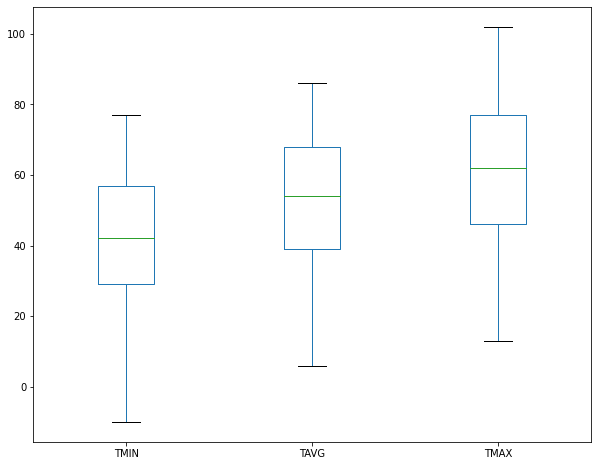

In [6]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind = "box", figsize = (10,8))


***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [7]:
weather["TDIFF"] = weather["TMAX"]-weather["TMIN"]

In [8]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [9]:
weather["TDIFF"].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

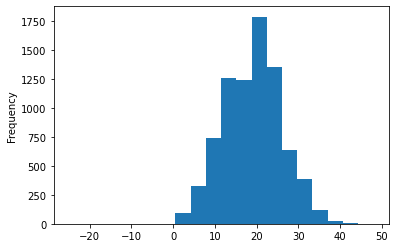

In [10]:
weather["TDIFF"].plot(kind ="hist", bins = 20)
plt.show()

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [11]:
WT = weather.loc[:,"WT01":"WT22"].copy()

In [12]:
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
weather["bad_conditions"] = WT.sum(axis = 1)

In [14]:
WT.sum(axis = 1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Length: 8022, dtype: float64

<AxesSubplot:ylabel='Frequency'>

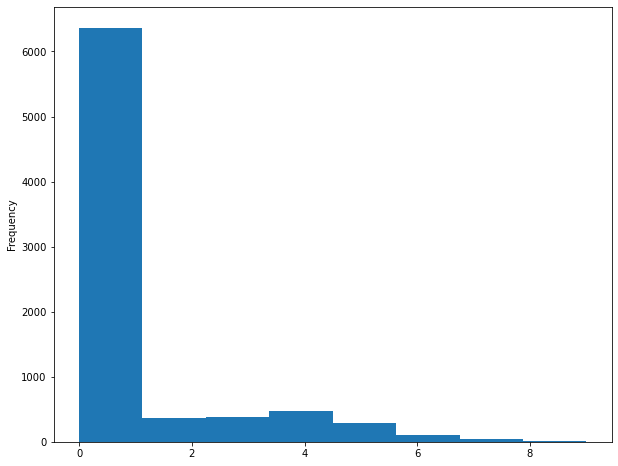

In [174]:
weather["bad_conditions"].plot(kind = "hist",figsize = (10,8), bins = 8)

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [16]:
weather["bad_conditions"].value_counts()

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [17]:
mapping = {0 : "good", 1: "bad", 2 : "bad", 3 : "bad", 4 : "bad", 5 : "worse", 6 : "worse", 7: "worse", 8 :"worse", 9: "worse" }

In [18]:
weather["rating"] = weather["bad_conditions"].map(mapping)

In [19]:
weather["rating"].unique()

array(['good', 'bad', 'worse'], dtype=object)

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [20]:
cats = pd.api.types.CategoricalDtype(categories = ["good", "bad", "worse"], ordered = True)

In [21]:
weather["rating"] = weather["rating"].astype(cats)

In [22]:
weather["rating"].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [207]:
ri = pd.read_csv("RI_cleaned.csv", nrows = 50000)

C:\Users\walke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [208]:
ri.shape

(50000, 26)

In [209]:
ri.drop(["state", "county_name", "county_fips", "fine_grained_location"], inplace = True, axis =1)

In [210]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,2005-01-04,11:30,Zone X1,0,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [211]:
ri.dropna(subset = ["driver_gender"], inplace = True)

In [212]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [213]:
ri.shape

(48010, 22)

In [214]:
ri["is_arrested"] = ri["is_arrested"].astype("bool")

In [215]:
x = ri["stop_date"] + " " + ri["stop_time"]

In [216]:
ri["stop_datetime"] = pd.to_datetime(x)

In [217]:
ri.set_index("stop_datetime", inplace = True)

In [218]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [219]:
Reset the index of the ri DataFrame.

Examine the head of ri to verify that stop_datetime is now a DataFrame column, and the index is now the default integer index.

Create a new DataFrame named weather_rating that contains only the DATE and rating columns from the weather DataFrame.

Examine the head of weather_rating to verify that it contains the proper columns.

SyntaxError: invalid syntax (<ipython-input-219-f035355629f9>, line 1)

In [220]:
ri.reset_index(inplace=True)

In [221]:
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [222]:
weather_rating = weather[["DATE", "rating"]]

In [223]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [224]:
ri.shape

(48010, 23)

In [225]:
ri_weather = ri.merge(weather_rating, left_on = "stop_date", right_on = "DATE", how = "left") 

In [226]:
ri_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
1,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,bad
2,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
3,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,bad
4,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good


In [227]:
ri_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95877 entries, 0 to 95876
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_datetime       95877 non-null  datetime64[ns]
 1   id                  95877 non-null  object        
 2   stop_date           95877 non-null  object        
 3   stop_time           95877 non-null  object        
 4   location_raw        95877 non-null  object        
 5   police_department   95877 non-null  object        
 6   driver_gender       95877 non-null  object        
 7   driver_age_raw      95877 non-null  float64       
 8   driver_age          95413 non-null  float64       
 9   driver_race_raw     95877 non-null  object        
 10  driver_race         95877 non-null  object        
 11  violation_raw       95877 non-null  object        
 12  violation           95877 non-null  object        
 13  search_conducted    95877 non-null  bool      

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [228]:
ri_weather["is_arrested"].value_counts(normalize = True)

False    0.948184
True     0.051816
Name: is_arrested, dtype: float64

In [229]:
ri_weather["is_arrested"].mean()

0.05181638974936638

In [230]:
ri_weather.groupby("rating")["is_arrested"].value_counts(normalize = True)

rating  is_arrested
good    False          0.948737
        True           0.051263
bad     False          0.948538
        True           0.051462
worse   False          0.937441
        True           0.062559
Name: is_arrested, dtype: float64

In [231]:
ri_weather.groupby("rating")["is_arrested"].mean()

rating
good     0.051263
bad      0.051462
worse    0.062559
Name: is_arrested, dtype: float64

In [237]:
ri_weather.groupby(["violation", "rating"])["is_arrested"].mean()

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [145]:
arrest_rate = ri_weather.groupby(["violation", "rating"])["is_arrested"].mean()

In [146]:
arrest_rate

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

In [148]:
arrest_rate.loc["Moving violation", "bad"]

0.11629857422421024

In [149]:
arrest_rate.loc["Speeding"]

rating
good     0.023061
bad      0.021220
worse    0.026168
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [156]:
arrest_rate.unstack(level = -1)

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [155]:
arrest_rate.unstack(level = 0)

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
rating,,,,,
good,0.121123,0.114006,0.275689,0.196108,0.023061
bad,0.125000,0.116299,0.283368,0.214286,0.021220
worse,0.150943,0.133835,0.270833,0.166667,0.026168


In [154]:
ri_weather.pivot_table(values = "is_arrested"  , index = "violation", columns= "rating", aggfunc='mean')

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168
